In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [27]:
z=np.matrix([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,-1],
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,-1],
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,-1], 
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,-1], 
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,-1], 
            [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,-1], 
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,-1], 
            [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,-1], 
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,-1], 
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,-1]])
d=np.array([[ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
            [-1, -1,  1, -1, -1, -1, -1, -1, -1, -1],
            [-1, -1, -1,  1, -1, -1, -1, -1, -1, -1],
            [-1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1,  1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1, -1,  1, -1, -1, -1],
            [-1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
            [-1, -1, -1, -1, -1, -1, -1, -1,  1, -1],
            [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]])
K = 10
J = 10
I = 37
emax = 0.001
eta = 1
l = 1
W = np.matrix(np.random.random((K,J)))
V = np.matrix(np.random.random((J-1,I)))

In [28]:
cycle_count = 0
error_list = list()
while True:
    error = 0
    cycle_count = cycle_count+1
    for x in range(len(z)):
        y = list()
        for j in range(J-1):
            net = np.matmul(V[j],z[x].T)
            output = (1-math.exp(-l*net))/(1+math.exp(-l*net))
            y.append(output)
        y.append(-1)
        y = np.array(y).reshape(J,1)
        deltaO = list()
        for k in range(K):
            net = np.matmul(W[k],y)
            output = (1-math.exp(-l*net))/(1+math.exp(-l*net))
            error = error + 0.5*(d[x][k]-output)**2
            deltaO.append(0.5*(d[x][k]-output)*(1-output**2))
        deltaO = np.array(deltaO).reshape(K,1)
        deltay = list()
        for j in range(J-1):
            deltay.append(np.matmul(W.T[j],deltaO)*0.5*(1-y[j]**2))
        deltay = np.array(deltay).reshape(J-1,1)
        W = W + eta*np.matmul(deltaO,y.T)
        V = V + eta*np.matmul(deltay,z[x].reshape(1,I))
    print(error)
    error_list.append(error)
    if(error<emax):
        break

85.6040774588
19.8965315432
19.4296614223
19.3468294605
19.2937351044
19.291333331
19.2991374096
19.2979090795
19.2902352377
19.2767367958
19.2544918343
19.2231034101
19.1896967374
19.1506371106
19.1028947778
19.0573071502
19.0250533804
19.0020903535
19.8114633221
19.2617474148
19.2418585052
19.287406532
18.9409651414
19.0690826471
19.3824895273
19.334593864
19.1003216289
19.3406145547
18.6219841415
19.1260823974
19.3290282249
18.8318520017
19.7237788989
16.4062463508
17.7400609344
16.3068725246
15.2733991446
12.9921670031
10.815017581
10.8981933237
8.9007421021
10.0734334282
12.1637262828
8.58358481336
11.3127724164
7.79857925055
6.34382423541
5.46611161373
8.13421661029
5.22639889908
3.72060231817
4.45613852291
5.42206919205
4.10304322522
2.13805753042
2.30403966621
0.799612882989
0.470427949594
0.232035620476
0.149496558259
0.138989436662
0.130848998053
0.124166476817
0.118465676591
0.113479804861
0.10904409382
0.105048505487
0.101415037379
0.0980858534366
0.0950165801988
0.09217225

0.00743404783972
0.00741966187503
0.00740533153065
0.00739105648349
0.00737683641296
0.00736267100096
0.00734855993185
0.00733450289242
0.00732049957186
0.00730654966177
0.0072926528561
0.00727880885115
0.00726501734553
0.00725127804017
0.00723759063824
0.00722395484519
0.0072103703687
0.00719683691865
0.00718335420713
0.00716992194838
0.0071565398588
0.00714320765692
0.00712992506337
0.00711669180088
0.00710350759424
0.0070903721703
0.00707728525793
0.00706424658802
0.00705125589345
0.00703831290908
0.00702541737173
0.00701256902015
0.00699976759501
0.00698701283889
0.00697430449626
0.00696164231344
0.00694902603861
0.0069364554218
0.00692393021484
0.00691145017136
0.0068990150468
0.00688662459832
0.00687427858489
0.00686197676718
0.00684971890758
0.00683750477021
0.00682533412086
0.006813206727
0.00680112235776
0.00678908078393
0.0067770817779
0.0067651251137
0.00675321056696
0.00674133791489
0.00672950693628
0.00671771741147
0.00670596912235
0.00669426185235
0.00668259538641
0.00667

0.00379959309176
0.00379582370118
0.00379206175742
0.00378830723845
0.00378456012228
0.00378082038706
0.00377708801099
0.00377336297237
0.00376964524958
0.00376593482109
0.00376223166546
0.00375853576131
0.00375484708736
0.00375116562243
0.00374749134539
0.00374382423522
0.00374016427096
0.00373651143175
0.00373286569679
0.00372922704539
0.00372559545692
0.00372197091082
0.00371835338665
0.003714742864
0.00371113932257
0.00370754274214
0.00370395310254
0.00370037038372
0.00369679456567
0.00369322562847
0.00368966355228
0.00368610831733
0.00368255990394
0.00367901829249
0.00367548346345
0.00367195539733
0.00366843407477
0.00366491947643
0.00366141158309
0.00365791037556
0.00365441583476
0.00365092794166
0.00364744667731
0.00364397202283
0.00364050395942
0.00363704246833
0.00363358753091
0.00363013912856
0.00362669724276
0.00362326185505
0.00361983294705
0.00361641050044
0.00361299449698
0.0036095849185
0.00360618174688
0.00360278496408
0.00359939455213
0.00359601049312
0.00359263276922


0.00253760721939
0.00253592008191
0.00253423517658
0.00253255249899
0.00253087204472
0.00252919380937
0.00252751778855
0.00252584397789
0.00252417237302
0.00252250296958
0.00252083576325
0.00251917074967
0.00251750792455
0.00251584728355
0.0025141888224
0.00251253253681
0.00251087842249
0.00250922647519
0.00250757669066
0.00250592906465
0.00250428359294
0.0025026402713
0.00250099909553
0.00249936006143
0.00249772316482
0.00249608840152
0.00249445576737
0.00249282525821
0.0024911968699
0.00248957059831
0.00248794643932
0.00248632438881
0.0024847044427
0.00248308659688
0.00248147084729
0.00247985718985
0.00247824562051
0.00247663613522
0.00247502872994
0.00247342340064
0.00247182014332
0.00247021895397
0.00246861982858
0.00246702276319
0.0024654277538
0.00246383479647
0.00246224388722
0.00246065502213
0.00245906819726
0.00245748340868
0.00245590065248
0.00245431992475
0.00245274122161
0.00245116453917
0.00244958987355
0.00244801722089
0.00244644657735
0.00244487793906
0.0024433113022
0.0

0.00190449262417
0.00190353967139
0.00190258766726
0.00190163661038
0.00190068649933
0.00189973733271
0.0018987891091
0.0018978418271
0.00189689548532
0.00189595008235
0.00189500561681
0.0018940620873
0.00189311949243
0.00189217783081
0.00189123710106
0.00189029730181
0.00188935843167
0.00188842048926
0.00188748347322
0.00188654738217
0.00188561221475
0.00188467796959
0.00188374464533
0.00188281224061
0.00188188075408
0.00188095018438
0.00188002053015
0.00187909179006
0.00187816396275
0.00187723704689
0.00187631104112
0.00187538594412
0.00187446175454
0.00187353847106
0.00187261609235
0.00187169461707
0.0018707740439
0.00186985437152
0.00186893559861
0.00186801772385
0.00186710074594
0.00186618466354
0.00186526947537
0.0018643551801
0.00186344177643
0.00186252926307
0.00186161763871
0.00186070690206
0.00185979705182
0.0018588880867
0.00185798000541
0.00185707280667
0.00185616648918
0.00185526105168
0.00185435649287
0.00185345281148
0.00185255000624
0.00185164807588
0.00185074701912
0.0

0.00152471012932
0.00152409796637
0.00152348629237
0.00152287510673
0.00152226440886
0.00152165419818
0.00152104447411
0.00152043523607
0.00151982648347
0.00151921821574
0.00151861043231
0.00151800313258
0.00151739631599
0.00151678998197
0.00151618412992
0.0015155787593
0.00151497386951
0.00151436945999
0.00151376553017
0.00151316207947
0.00151255910733
0.00151195661319
0.00151135459646
0.00151075305659
0.00151015199302
0.00150955140517
0.00150895129248
0.00150835165439
0.00150775249033
0.00150715379976
0.0015065555821
0.00150595783679
0.00150536056329
0.00150476376103
0.00150416742945
0.001503571568
0.00150297617612
0.00150238125326
0.00150178679887
0.00150119281239
0.00150059929327
0.00150000624097
0.00149941365493
0.0014988215346
0.00149822987944
0.0014976386889
0.00149704796242
0.00149645769948
0.00149586789951
0.00149527856199
0.00149468968636
0.00149410127208
0.00149351331862
0.00149292582542
0.00149233879197
0.0014917522177
0.00149116610209
0.0014905804446
0.00148999524469
0.001

0.00126994260643
0.00126951712562
0.00126909192838
0.00126866701444
0.00126824238352
0.00126781803533
0.00126739396959
0.00126697018602
0.00126654668434
0.00126612346427
0.00126570052553
0.00126527786783
0.0012648554909
0.00126443339446
0.00126401157823
0.00126359004194
0.00126316878529
0.00126274780802
0.00126232710985
0.0012619066905
0.0012614865497
0.00126106668716
0.00126064710262
0.00126022779579
0.0012598087664
0.00125939001418
0.00125897153886
0.00125855334015
0.00125813541778
0.00125771777149
0.00125730040099
0.00125688330602
0.00125646648631
0.00125604994157
0.00125563367154
0.00125521767595
0.00125480195453
0.00125438650701
0.00125397133311
0.00125355643257
0.00125314180511
0.00125272745048
0.00125231336839
0.00125189955858
0.00125148602079
0.00125107275474
0.00125065976017
0.00125024703682
0.0012498345844
0.00124942240266
0.00124901049134
0.00124859885016
0.00124818747887
0.00124777637719
0.00124736554486
0.00124695498162
0.0012465446872
0.00124613466134
0.00124572490378
0.0

0.0010856772832
0.0010853658101
0.00108505451477
0.00108474339705
0.00108443245678
0.00108412169383
0.00108381110804
0.00108350069925
0.00108319046732
0.00108288041209
0.00108257053341
0.00108226083114
0.00108195130512
0.00108164195521
0.00108133278124
0.00108102378308
0.00108071496058
0.00108040631357
0.00108009784192
0.00107978954548
0.00107948142409
0.00107917347761
0.00107886570589
0.00107855810878
0.00107825068613
0.0010779434378
0.00107763636363
0.00107732946348
0.0010770227372
0.00107671618464
0.00107640980566
0.0010761036001
0.00107579756783
0.00107549170869
0.00107518602254
0.00107488050924
0.00107457516862
0.00107427000056
0.0010739650049
0.0010736601815
0.00107335553021
0.00107305105088
0.00107274674338
0.00107244260755
0.00107213864326
0.00107183485034
0.00107153122867
0.0010712277781
0.00107092449848
0.00107062138967
0.00107031845152
0.00107001568389
0.00106971308664
0.00106941065962
0.00106910840269
0.00106880631571
0.00106850439853
0.00106820265101
0.00106790107301
0.001

In [29]:
# print("Weight vector W after adjustment is:\n {}".format(W))
# print("Weight vector V after adjustment is:\n {}".format(V))
print("Final error in the neural network is: %f"%error)
print("No. of training cycles required to train the network are: %d"%cycle_count)

Final error in the neural network is: 0.001000
No. of training cycles required to train the network are: 3828


In [32]:
z = np.array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,-1]])
y = list()
for j in range(J-1):
    net = np.matmul(V[j],z.T)
    output = (1-math.exp(-l*net))/(1+math.exp(-l*net))
    y.append(output)
y.append(-1)
y = np.array(y).reshape(J,1)
for k in range(K):
    net = np.matmul(W[k],y)
    output = (1-math.exp(-l*net))/(1+math.exp(-l*net))
    print(output)

0.990894762782
-0.999999986507
-0.995623754544
-0.999741864785
-0.998123397281
-0.999987507956
-0.996475756552
-0.998108918677
-0.999873278531
-0.996259593309


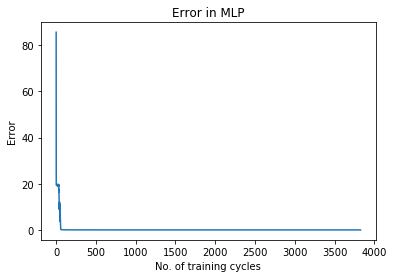

In [35]:
x = np.arange(0,len(error_list))
y = np.array(error_list)
plt.plot(x, y)
plt.xlabel('No. of training cycles')
plt.ylabel('Error')
plt.title("Error in MLP")
plt.show()